In [1]:
import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score

In [4]:
data = fetch_olivetti_faces()
targets = data.target

data_np = data.images.reshape((len(data.images), -1)) #data_no is numpy array

In [5]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)

In [6]:
data.images[0].shape

(64, 64)

In [7]:
data_np.shape

(400, 4096)

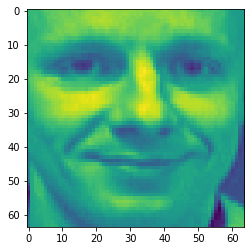

In [8]:
plt.imshow(data.images[200])

In [37]:
a=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
a

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [38]:
b=a.reshape(2,6)
b

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [41]:
c=b.reshape(4,3)==a
c

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [43]:
data.images.shape

(400, 64, 64)

In [44]:
data_orig=data_np.reshape(400,64,64)

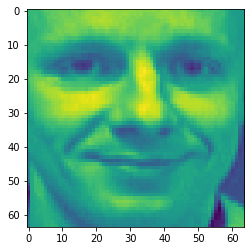

In [46]:
plt.imshow(data_orig[200])

In [9]:
NMFcl=decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3)

"faces.shape" in sklearn = "data.images[0].shape" here

In [10]:
data_np[:2]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256]], dtype=float32)

In [11]:
NMFcl.fit(data_np)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvda', l1_ratio=0.0,
    max_iter=200, n_components=6, random_state=None, shuffle=False, solver='cd',
    tol=0.005, verbose=0)

In [12]:
components_=NMFcl.components_

Credit: https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py

In [13]:

def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

Next line shows centering not needed !?

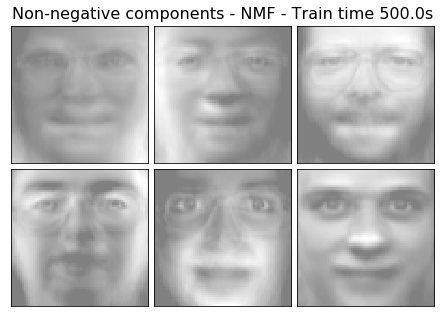

In [14]:
plot_gallery('%s - Train time %.1fs' % ('Non-negative components - NMF',500),
                 components_[:n_components])
plt.show()

In [15]:
NMFcl.reconstruction_err_

117.71612385373754

In [16]:
targets[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4])

In [17]:
np.unique(targets)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [18]:
components_[:5]

array([[0.        , 0.        , 0.        , ..., 1.90152302, 1.7887896 ,
        1.68666161],
       [0.96140629, 1.03690306, 1.10603725, ..., 0.25735675, 0.31324854,
        0.32485548],
       [0.02196785, 0.01088893, 0.06073465, ..., 0.13595543, 0.14157764,
        0.15457872],
       [0.18524888, 0.26571145, 0.38151412, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Image Reconstruction using Non-negative matrix factorization

In [19]:
data_np_W=NMFcl.transform(data_np) #=W of W*H, hasn't been used yet ,train_split below with non-transformed data

In [48]:
data_npX=np.dot(data_np_W,components_)

In [49]:
data_Xorig=data_npX.reshape(400,64,64)

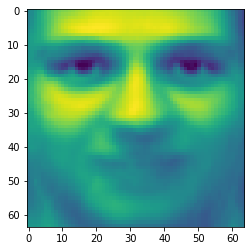

In [50]:
plt.imshow(data_Xorig[200])

In [53]:
data_np.nbytes

6553600

In [54]:
data_npX.nbytes

13107200

In [55]:
data_np_W.nbytes

19200

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    data_np,
    targets,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)

# Random Forest Classifier with and without Non-negative matrix factorization

In [21]:
rf = RandomForestClassifier()

In [22]:
kfold = KFold(n_splits=5)

In [23]:
cv_score=cross_val_score(rf, X_train, y_train, cv=kfold,scoring='accuracy')
cv_score

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:2

array([0.671875, 0.734375, 0.671875, 0.65625 , 0.640625])

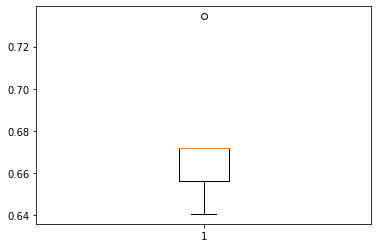

In [24]:
plt.boxplot(cv_score)
plt.show()

In [63]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
y_pred_rf=rf.predict(X_test)

In [65]:
y_pred_rf

array([20, 28,  3, 21,  9,  8, 32,  9, 26,  0,  0, 36,  5,  7, 13, 13,  0,
       37, 23, 38,  4,  1, 39, 27,  0, 39, 11,  8, 26, 10, 39, 19,  1,  5,
       23,  8, 13, 20, 15, 14, 33,  5,  7,  2,  8, 38, 14, 18,  2, 17, 24,
       32, 33,  7, 37,  1,  8,  3,  3, 15, 12, 29, 36,  6, 10,  3, 35, 26,
        4,  7, 32, 14,  0,  4, 38, 24, 22, 25, 17, 28])

In [66]:
rf_pred=y_pred_rf == y_test
print(np.array(y_pred_rf == y_test)[:25])
print('Percentage correct RF: ', 100*np.sum(y_pred_rf == y_test)/len(y_test))

[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True False False  True  True  True False  True  True  True
  True]
Percentage correct RF:  77.5


In [29]:
rf_pred

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True])

In [30]:
#plt.imshow(data.images[5])

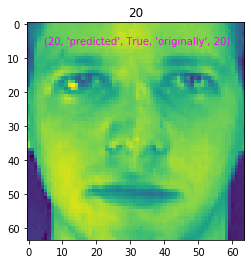

In [31]:
# w = 10
# h = 10
# fig = plt.figure(figsize=(9, 13))
# columns = 4
# rows = 5

# # prep (x,y) for extra plotting
# xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
# ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
# ax = []
# fig, ax = plt.subplots(nrows=2, ncols=2)
#for i in range(columns*rows):
for i in range(1):
#     img = np.random.randint(10, size=(h,w))
#     # create subplot and append to ax
#     ax.append( fig.add_subplot(rows, columns, i+1) )
#     ax[-1].set_title("ax:"+str(i))  # set title
    plt.title(y_pred_rf[i])
    plt.text(32, 5, (y_pred_rf[i],"predicted",rf_pred[i],"originally",y_test[i]), horizontalalignment='center',color='magenta',
     verticalalignment='center')
#     plt.imshow(img, alpha=0.25)
    plt.imshow(data.images[i])
    plt.show()

# # do extra plots(.me curve on image) on selected axes/subplots
# # note: index starts with 0
# ax[2].plot(xs, 3*ys)
# ax[19].plot(ys**2, xs)

  # finally, render the plot

In [32]:
X_trainW, X_testW, y_trainW, y_testW = train_test_split(
    data_np_W,
    targets,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)

In [57]:
rf.fit(X_trainW,y_trainW)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
y_pred_rfW=rf.predict(X_testW)

In [62]:
y_pred_rfW == y_test
print(np.array(y_pred_rfW == y_test)[:25])
print('Percentage correct RF: ', 100*np.sum(y_pred_rfW == y_test)/len(y_test))

[ True False  True  True  True  True  True  True False False False  True
  True  True  True False False  True  True  True  True  True False False
  True]
Percentage correct RF:  53.75
